## Neural Network 

In [3]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# You may need to change these three lines according to the file you are reading and the layout of your csv file
df = pd.read_csv('../BE223A/features_encoded_final.csv')
X = np.array(df.iloc[:,:-3]) # features           
y = np.array(df.iloc[:,-3])  # Labels

def multi_perceptron(X, y, df):
    """
    Implementation of Multilayer Perceptron
    One-hot encoding on Weekdays feature was tried but the performance was not improved.
    Thus, this code is still using weekdays feature as continuous variable.
    
    Input
        df: Dataframe of features, folds information, original index and labels for all subjects
        X: Array of features
        y: Array of labels
    
    Output
        K_test: Nested list of Labels for each fold
        K_pred: Nested list of Predicted labels for each fold
        test_pred: Nested list of index for each test fold
        
    """
    
    # Easiest way to normalize (min-max method)
    # Age and Weekdays features are scaled to [0, 1]
    X[:,0] = (X[:, 0] - np.min(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))
    
    X[:,1] = (X[:, 1] - np.min(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1])) 
    # You may need to change this line if you want to one-hot encode Weekdays
    

    # classifier
    K_test = []
    K_pred = []
    test_pred = []
    for i in range(5):
        test_index = df[df['Folds'] == i].index.values
        train_index = df[df['Folds'] != i].index.values
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                            hidden_layer_sizes=(10, 8, 5), random_state=1)
        clf.fit(X_train, y_train)
        K_test.append(y_test)
        K_pred.append(clf.predict(X_test))
        test_pred.append(test_index)
    

    for i, K in enumerate(K_test):
        print("Testing fold {}:".format(i))
        print("Accuracy score:", accuracy_score(K, K_pred[i]))
        print("Recall score:", recall_score(K, K_pred[i]))
        print("The precision:", precision_score(K, K_pred[i]))
        print("The f1 score:", f1_score(K, K_pred[i]))
        
    return K_test, K_pred, test_pred

K_test, K_pred, test_pred = multi_perceptron(X, y, df)

TRAIN: [    0     1     2 ..., 27612 27613 27614] TEST: [   35    36    39 ..., 27591 27601 27609]
TRAIN: [    1     2     3 ..., 27612 27613 27614] TEST: [    0     5     8 ..., 27584 27593 27595]
TRAIN: [    0     1     2 ..., 27612 27613 27614] TEST: [    4     6     7 ..., 27605 27610 27611]
TRAIN: [    0     4     5 ..., 27611 27612 27613] TEST: [    1     2     3 ..., 27604 27608 27614]
TRAIN: [    0     1     2 ..., 27610 27611 27614] TEST: [   15    18    20 ..., 27607 27612 27613]
Testing fold 0:
Accuracy score: 0.718761318363
Recall score: 0.830148619958
The precision: 0.686165545481
The f1 score: 0.751321056845
Testing fold 1:
Accuracy score: 0.719247467438
Recall score: 0.823230490018
The precision: 0.680468046805
The f1 score: 0.745072273325
Testing fold 2:
Accuracy score: 0.712944574833
Recall score: 0.825150123631
The precision: 0.68085106383
The f1 score: 0.746087511977
Testing fold 3:
Accuracy score: 0.730699528815
Recall score: 0.838391224863
The precision: 0.68714414

## Making csv file for original indices of FP and FN

In [ ]:
from itertools import compress
true_list = []
false_list = []
FP_list = []
FN_list = []

for i, pred in enumerate(test_pred):
    FP_bools = np.logical_and(K_pred[i] == 1, K_test[i] == 0)
    FN_bools = np.logical_and(K_pred[i] == 0, K_test[i] == 1)
    FP_list.append(list(compress(pred, FP_bools)))
    FN_list.append(list(compress(pred, FN_bools)))
    

FP_flat = [item for sublist in FP_list for item in sublist]
FN_flat = [item for sublist in FN_list for item in sublist]

# Initialization list of FN and FP
FP_pred = []
FN_pred = []

FP_pred = pd.DataFrame({'FP': sorted(np.array(df.loc[FP_flat]['orig_index']))})
FN_pred = pd.DataFrame({'FN': sorted(np.array(df.loc[FN_flat]['orig_index']))})

df2 = pd.DataFrame()
df2 = pd.concat([FP_pred, FN_pred], ignore_index=False, axis=1)
df2.to_csv('../Midterm/FP_FN_indeces_James2.csv', index=False)

## Useful function for making confusion matrix
The only line that need to change: "cnf_matrix = confusion_matrix(K_test[3], K_pred[3])"

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[1739 1044]
 [ 442 2293]]
Normalized confusion matrix
[[ 0.62  0.38]
 [ 0.16  0.84]]


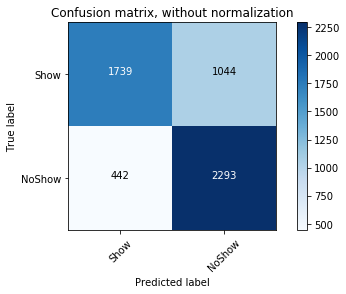

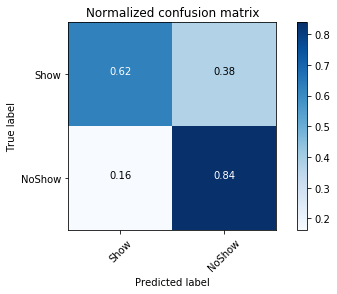

In [5]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['Show', 'NoShow']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(K_test[3], K_pred[3]) # Making plot for fold 3
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()